In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap

# new_path = '/capstor/scratch/cscs/ajayaraj/qtpyt-tests/pentacene'
# os.chdir(new_path)

In [2]:
def expand_sparse_self_energy(sigma_small, index_active, target_size, target_range):
    """
    Expand a sparse self-energy matrix to a dense matrix of size (target_size, target_size),
    inserting values only at the positions that lie within target_range.

    Parameters
    ----------
    sigma_small : np.ndarray
        (n_active, n_active) self-energy matrix in the active subspace.
    index_active : np.ndarray
        Indices in the full space where the active orbitals reside.
    target_size : int
        Size of the expanded self-energy matrix (typically a lead block size).
    target_range : tuple
        (start, end) range in full space corresponding to the lead region.

    Returns
    -------
    sigma_expanded : np.ndarray
        (target_size, target_size) full-sized self-energy with values inserted at appropriate indices.
    """

    start, end = target_range
    sigma_expanded = np.zeros((target_size, target_size), dtype=complex)

    # Map global indices to local within the lead block
    active_indices = np.array([i for i in index_active if start <= i < end]) - start

    print("start",start)
    print("end",end)
    print("active_indices",active_indices)
    for i_small, i_large in enumerate(active_indices):
        for j_small, j_large in enumerate(active_indices):
            sigma_expanded[i_large, j_large] = sigma_small[i_small, j_small]

    return sigma_expanded


In [3]:
data_folder = "./output/lowdin"
self_energy = np.load(f"{data_folder}/self_energy.npy", allow_pickle=True)
nodes = np.load(f"{data_folder}/nodes.npy")
index_active_region = np.load(f"{data_folder}/index_active_region.npy")
print("self_energy_shape",self_energy[0].shape)
print("nodes",nodes)
print("index active region", index_active_region)
print("self_energy",self_energy[0].shape)


self_energy_shape (132, 132)
nodes [  0 132 684 816]
index active region [301 310 323 332 345 354 367 376 389 398 411 420 433 442 451 460 477 486
 499 508 521 530]
self_energy (132, 132)


/tmp/ipykernel_1008626/1002788523.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', 256)


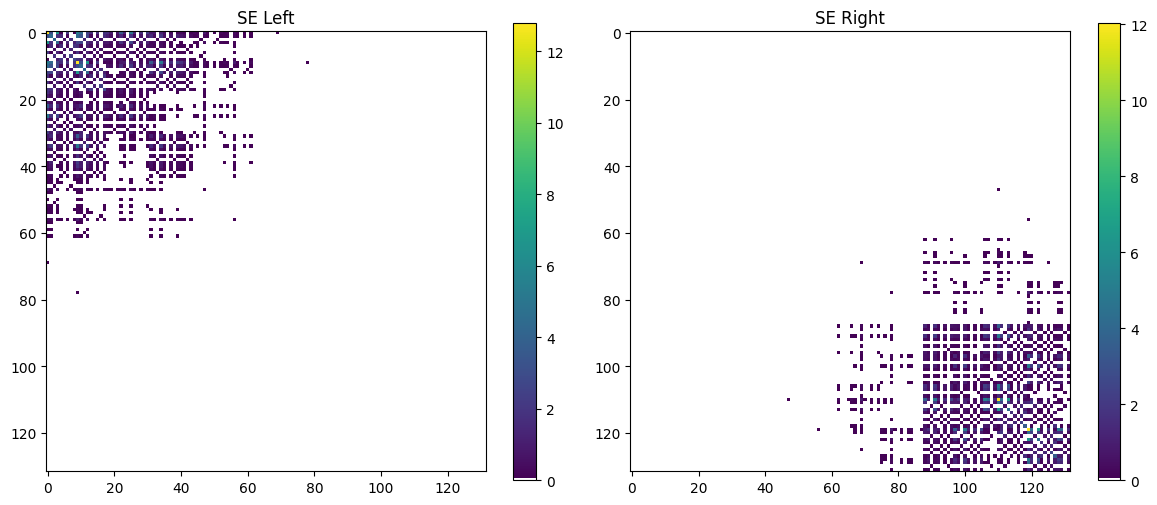

In [21]:
cmap = cm.get_cmap('viridis', 256)
new_colors = cmap(np.linspace(0, 1, 256))
new_colors[0] = [1, 1, 1, 1]
new_cmap = ListedColormap(new_colors)

se_left = self_energy[0].retarded(0.0).real
se_right = self_energy[1].retarded(0.0).real
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

im0 = axs[0].imshow(np.abs(se_left), cmap=new_cmap)
axs[0].set_title('SE Left')
fig.colorbar(im0, ax=axs[0])


im1 = axs[1].imshow(np.abs(se_right), cmap=new_cmap)
axs[1].set_title('SE Right')
fig.colorbar(im1, ax=axs[1])

plt.tight_layout()
plt.show()

In [23]:
sigma_left = expand_sparse_self_energy(
    sigma_small=se_left,
    index_active=index_active_region,
    target_size=nodes[1] - nodes[0],
    target_range=(nodes[0], nodes[1])
)
sigma_right = expand_sparse_self_energy(
    sigma_small=se_right,
    index_active=index_active_region,
    target_size=nodes[3] - nodes[2],
    target_range=(nodes[2], nodes[3])
)

start 0
end 290
active_indices [  3  12  21  30  47  56  69  78  91 100 113 122 135 144 157 166 179 188
 197 206 223 232 245 254 267 276]
start 544
end 816
active_indices [ 11  20  33  42  55  64  77  86  99 108 121 130 143 152 161 170 187 196
 209 218 231 240 253 262]


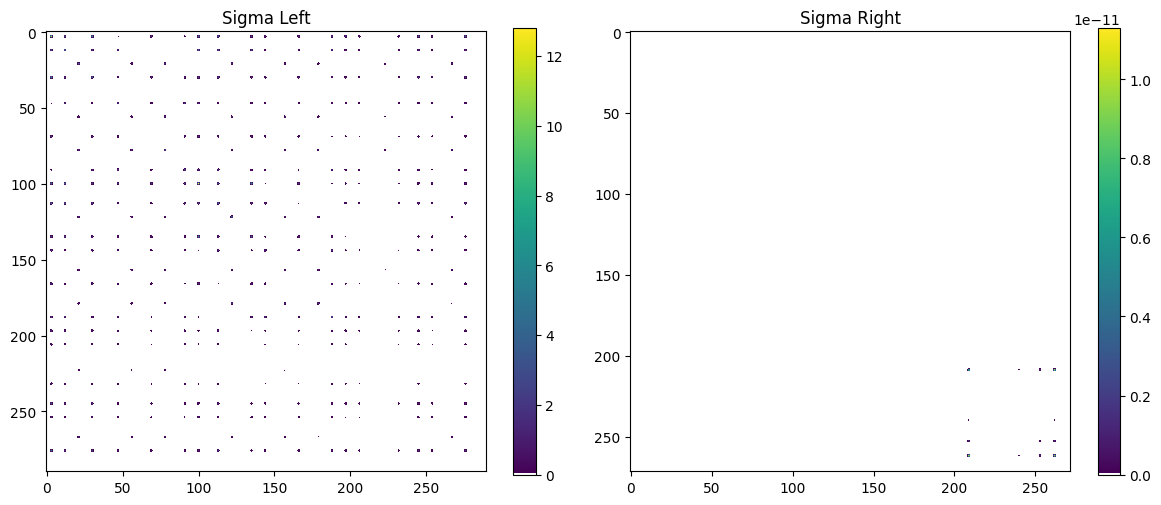

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

im0 = axs[0].imshow(np.abs(sigma_left), cmap=new_cmap)
axs[0].set_title('Sigma Left')
fig.colorbar(im0, ax=axs[0])

im1 = axs[1].imshow(np.abs(sigma_right), cmap=new_cmap)
axs[1].set_title('Sigma Right')
fig.colorbar(im1, ax=axs[1])

plt.tight_layout()
plt.show()